# Análise de dados com Python e Pandas - DIO

O objetivo da Análise Exploratória dos Dados é fazer uma descoberta nos dados. Dessa forma é possível identificar problemas nos dados ou obter insights. O Python possui um conjunto de bibliotecas prontas para realizar essa atividade.

Vamos ver algumas funções das bibliotecas Pandas, Matplotlib e Seaborn. Falando do Pandas, é uma biblioteca bastante conhecida e de fácil manipulação, com ela é possível manipular e analisar os dados. Já as bibliotecas Matplotlib e Seaborn são ferramentas gráficas para visualização de dados.

Aqui, vamos fazer a manipulação e análise dos dados de um dataset de vendas, onde temos informações de vendas dos anos 2008 e 2009. O dados estão disponíveis no meu [GitHub](https://github.com/diasctiago/dio/blob/main/An%C3%A1lise%20de%20dados%20com%20Python%20e%20Pandas/AdventureWorks.xlsx?raw=true). Let's Code ao Cubo!!!

By: [Tiago Dias](https://www.linkedin.com/in/diasctiago/)

In [32]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Importando dados com pandas direto do GitHub
df = pd.read_excel('https://github.com/diasctiago/dio/blob/main/An%C3%A1lise%20de%20dados%20com%20Python%20e%20Pandas/AdventureWorks.xlsx?raw=true')

In [34]:
# Exibindo os primeiros registros
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


## Análise da Estrutura dos Dados

Vamos fazer uma verificação na estrutura dos dados carregados. Analisar os tipos de dados, o tamanho do dataset e os dados nulos.

In [35]:
# Verificando as colunas do dataset
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

In [36]:
# Consultando detalhes do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [37]:
# Tamanho do dataset
df.shape

(904, 16)

In [38]:
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

O dataset possui 904 registros e 16 atributos.


In [39]:
# Descrição estatística básica das variáveis numéricas
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [40]:
# Verificando dados nulos
df.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

## Análise para Enriquecimento dos Dados

Com todos os atributos que vimos acima referente as vendas dos produtos, podemos identificar novos atributos que vão enriquecer a nossa exploração dos dados. Vamos criar algumas novas colunas no dataset com base nas colunas existentes.

In [41]:
# Verificando a linha 1 do dataframe
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [42]:
# Dias de envio da compra
df['Dias de Envio'] = df['Data Envio'] - df['Data Venda']

In [43]:
# Custo total do produto
df['Custo Total'] = df['Custo Unitário'] * df['Quantidade']

In [44]:
# Lucro bruto da venda
df['Lucro Bruto'] = df['Valor Venda'] - df['Custo Total']

In [45]:
# Lucro líquido da venda
df['Lucro Líquido'] = df['Lucro Bruto'] - df['Valor Desconto']

In [46]:
# Percentual do Lucro bruto da venda
df['% Lucro Bruto'] = ( 1 - ( df['Custo Total'] / df['Valor Venda'] ) ) * 100

In [47]:
# Percentual do Lucro líquido da venda
df['% Lucro Líquido'] = ( 1 - ( df['Custo Total'] / ( df['Valor Venda'] - df['Valor Desconto'] ) ) )*100

## Análise para o Negócio

Se os dados não resolver problemas do negócio, eles não estão sendo coletados corretamente ou estamos olhando para os dados errados. Sendo assim, os dados precisam conseguir responder algumas dúvidas do negócio. Então, vamos criar algumas perguntas sobre os dados que estamos explorando.

### Quais são os produto?

In [48]:
# Contagem de venda por produto
df['Produto'].value_counts()

Adventure Works Laptop15.4W M1548 Black            123
Fabrikam Trendsetter 2/3'' 17mm X100 Grey          118
Adventure Works Laptop15.4W M1548 Red              115
Fabrikam Trendsetter 2/3'' 17mm X100 Black         103
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey          94
Fabrikam Trendsetter 1/3'' 8.5mm X200 White         90
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black         89
Headphone Adapter for Contoso Phone E130 Silver     87
Headphone Adapter for Contoso Phone E130 White      85
Name: Produto, dtype: int64

In [49]:
# Contagem de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

### Quais são as loja?

In [50]:
# Lojas únicas
df['ID Loja'].unique()

array([199, 306, 307])

### Quantas lojas?

In [51]:
# Quantidade de lojas únicas
len(df['ID Loja'].unique())

3

### Qual a primeira e última data de venda?

In [52]:
# Menor data no conjuto de dados
df['Data Venda'].min()

Timestamp('2008-01-02 00:00:00')

In [53]:
# Maior data no conjuto de dados
df['Data Venda'].max()

Timestamp('2009-12-31 00:00:00')

### Quais os valores médios por produto?

In [54]:
# Agrupamento dos valores médios por produtos
valores = ['Produto', 'Valor Desconto', 'Valor Venda', 
           'Custo Total', 'Lucro Bruto', 'Lucro Líquido',
           '% Lucro Bruto', '% Lucro Líquido']
df[valores].groupby(['Produto']).mean()

,Valor Desconto,Valor Venda,Custo Total,Lucro Bruto,Lucro Líquido,% Lucro Bruto,% Lucro Líquido
Produto,,,,,,,
Adventure Works Laptop15.4W M1548 Black,639.616423,6071.456748,3086.208293,2985.248455,2345.632033,48.535883,40.090469
Adventure Works Laptop15.4W M1548 Red,728.800522,6172.295130,3173.593565,2998.701565,2269.901043,48.381596,39.832728
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,936.029326,8986.622360,3287.586067,5699.036292,4763.006966,63.136235,57.524054
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,659.317021,8312.065957,2972.422340,5339.643617,4680.326596,63.730700,58.925853
Fabrikam Trendsetter 1/3'' 8.5mm X200 White,815.476889,7933.656444,2898.786000,5034.870444,4219.393556,63.295974,57.783949
Fabrikam Trendsetter 2/3'' 17mm X100 Black,835.759223,7974.726214,2919.057670,5055.668544,4219.909320,63.380356,58.038870
Fabrikam Trendsetter 2/3'' 17mm X100 Grey,883.245763,8144.381356,2991.000254,5153.381102,4270.135339,62.819290,56.522933
Headphone Adapter for Contoso Phone E130 Silver,292.831014,2604.498641,1476.217011,1128.281630,835.450616,42.636315,32.660230
Headphone Adapter for Contoso Phone E130 White,306.173520,2633.002009,1497.537882,1135.464127,829.290607,42.936747,33.856421


### Quais os valores totais?

In [55]:
# Somando os valores totais
total_descontos = df['Valor Desconto'].sum()
total_vendas = df['Valor Venda'].sum()
total_custos = df['Custo Total'].sum()
total_lucro_bruto = df['Lucro Bruto'].sum()
total_lucro_liquido = df['Lucro Líquido'].sum()

In [56]:
# Usando a função currency da biblioteca locale para formatar o valor
import locale
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')

print('Total de descontos foi ---->',locale.currency(total_descontos))
print('Total de vendas foi ------->',locale.currency(total_vendas))
print('Total de custos foi ------->',locale.currency(total_custos))
print('Lucro bruto foi ----------->',locale.currency(total_lucro_bruto))
print('Lucro líquido foi --------->',locale.currency(total_lucro_liquido))

Total de descontos foi ----> $622967.46
Total de vendas foi -------> $5984606.14
Total de custos foi -------> $2486783.05
Lucro bruto foi -----------> $3497823.09
Lucro líquido foi ---------> $2874855.64


## Análise Gráfica dos Dados

Nada mais claro para entender os dados e gerar insights do que visualizações gráficas. Então vamos criar alguns gráficos para continuar a nossa exploração dos dados. Agora as bibliotecas gráficas do Python vão ser muito úteis.

In [57]:
# Configurações dos gráficos
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15 
plt.rcParams['axes.titlesize'] = 20

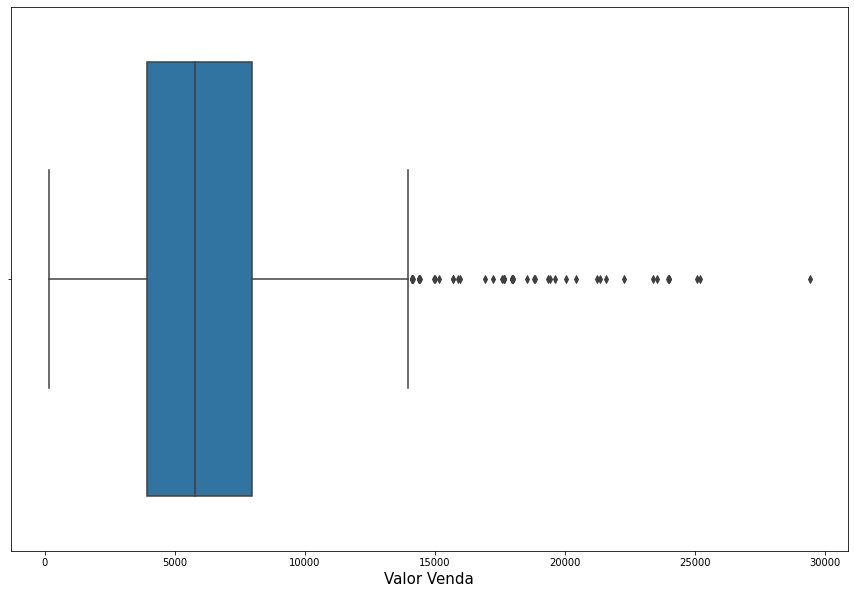

In [58]:
# Identificando outliers nos valores de vendas
sns.boxplot(x = df['Valor Venda'])
plt.show()

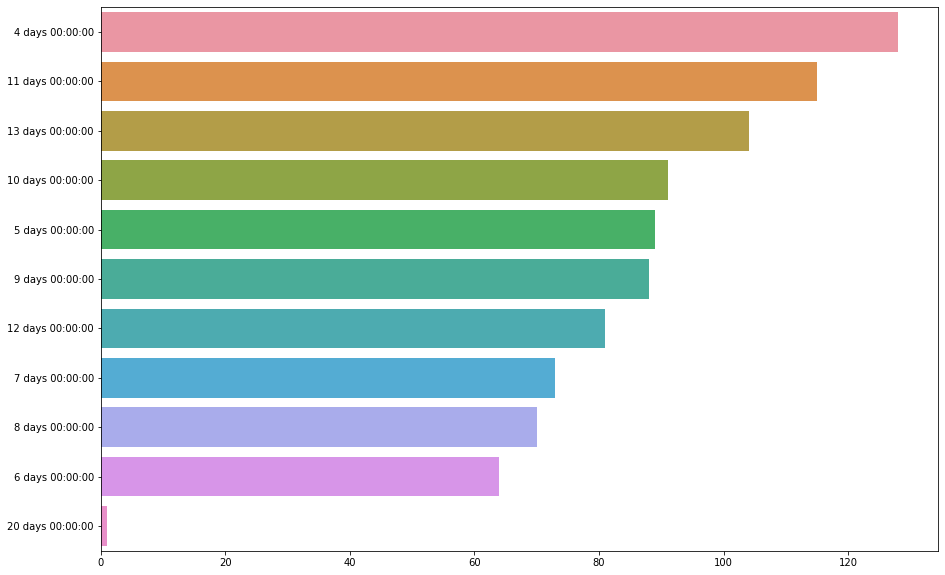

In [59]:
# Identificando as quantidades dos dias de envio
x = df['Dias de Envio'].value_counts().values
y = df['Dias de Envio'].value_counts().index
sns.barplot( x=x, y=y ) 
plt.show()

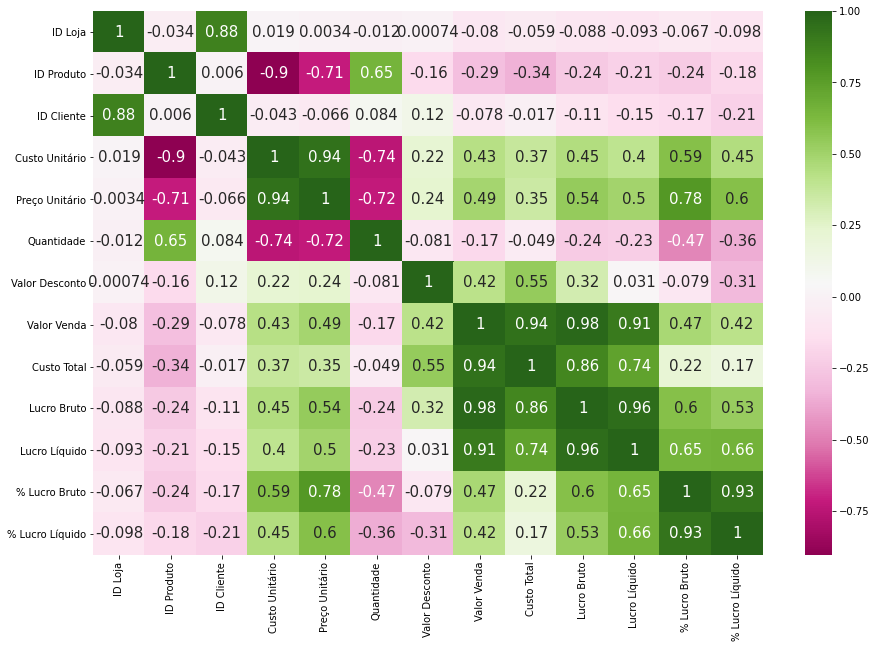

In [60]:
# Mapa de correlação das variáveis numéricas
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

In [61]:
#Selecionando apenas as vendas de 2008
df_2008 = df[df["Data Venda"].dt.year == 2008]
#Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

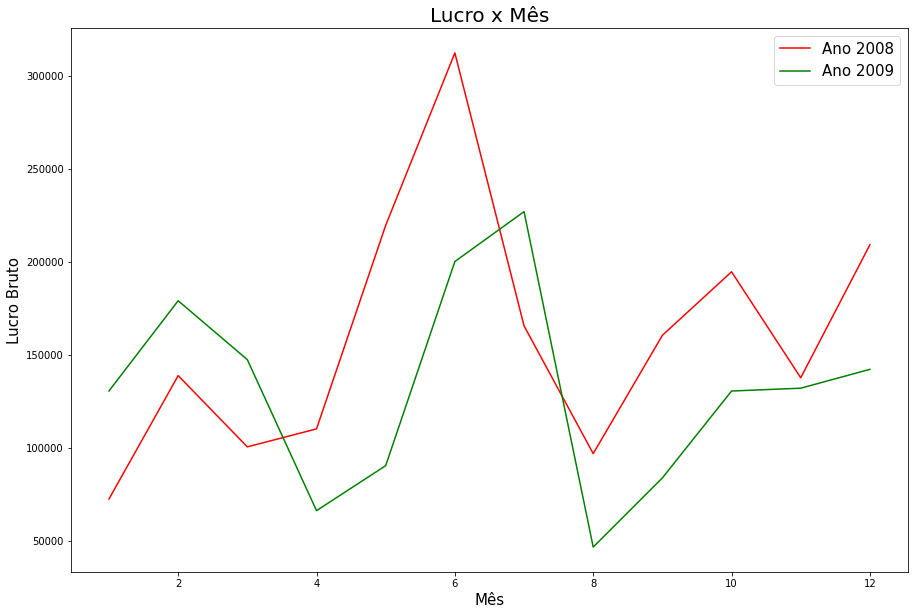

In [62]:
# Comparativo de lucro bruto por mês
df_2008.groupby(df_2008["Data Venda"].dt.month)["Lucro Bruto"].sum().plot(color='red', label='Ano 2008')
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro Bruto"].sum().plot(color='green', label='Ano 2009')
plt.title("Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro Bruto")
plt.legend()
plt.show()

## Conclusões

A atividade de análise exploratória dos dados é uma das etapas mais importantes na área de ciência de dados. Deve ser realizada da forma mais completa possível, afim de entender os dados e gerar valor para o negócio.

O Python e suas bibliotecas para ciência de dados facilitam e muito essa atividade, com ferramentas cada vez mais completas e poderosas. É um processo trabalho mais muito importante e nunca deve ser negligenciado. 

O que vimos aqui é só a pontinha do iceberg, a criatividade é o limite na análise exploratória dos dados. Go Go Go EDA!